<div id="image">
<img src="https://www.imt-atlantique.fr/sites/default/files/logo_mt_0_0.png" WIDTH=280 HEIGHT=280>
</div>
<div id="subject">
<CENTER>
</br>


<font size="5"></br> UE Introduction au Machine Learning: Project ML </font></br></div>
</CENTER>
<CENTER>
<font size="3"></br></font></br></div>
</CENTER>
<CENTER>
<span style="color:blue"></span>
</CENTER>

**The objective of the project is to apply a Machine Learning model onto two different datasets:**
- Banknote Authentication Dataset
- Chronic Kidney Disease:


Workflow : 

1. Import the dataset
2. Clean the data, perform pre-processing
I Replace missing values by average or median values
I Center and normalize the data
3. Split the dataset
I Split between training set and test set
I Split the training set for cross-validation
4. Train the model (including feature selection)
5. Validate the model

**Objective:** collaboratively implement this workflow and apply it to different ML problems/datasets

# Import Data 



In [1]:
from library import *
import numpy as np
import scipy.io as sio
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
from pylab import *
from sklearn import svm
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA

In [2]:
data_bank = pd.read_csv('./data/data_banknote_authentication.txt', sep=",", header=None)
data_disease = pd.read_csv('./data/kidney_disease.csv', sep=",", header=0) 

# Dataset Cleaning 
- Handle missing and categorical values
- Replace missing values by average or median values
- Center and normalize the data

In [3]:
data_bank_cleaned = clean_data_f(data_bank)
data_disease_cleaned = clean_data_f(data_disease)
#data_cleaned.head()
#data_disease_cleaned.head()

# Split the data set & PCA
- Split between training set and test set
- Split the training set for cross-validation

In [4]:
#Assumption of PCA : Data are gaussian distributed. We can check this assumption thanks to Shapiro Test 
p_values_bank = shapiro_test(data_bank_cleaned)
p_values_disease = shapiro_test(data_disease_cleaned)

print(f"{p_values_bank = }")
print(f"{p_values_disease = }")

SyntaxError: invalid syntax (<fstring>, line 1)

Comment: Au vu des valeurs de p value, l'hypothèse selon laquelle les distributions sont normales ne semble pas vérifiée bien que les résultats obtenus par PCA soient tout à fait satisfaisant par la suite 

In [5]:
X_train_bank, X_test_bank, y_train_bank, y_test_bank = split_data_df(data_bank_cleaned, test_size=1/3)
X_train_disease, X_test_disease, y_train_disease, y_test_disease, nb_features_disease = split_data_and_pca(data_disease_cleaned, test_size=1/3)

#print(f"{nb_features_disease = }")

# SVM Method

Cross Validation

In [ ]:
from sklearn import svm
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [ ]:
X = dataset_to_numpy(data_bank_cleaned)
y = data_bank_cleaned[4].to_numpy() 

In [ ]:
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import KFold

In [ ]:
classes_labels = [0, 1]

clf = svm.SVC()
train_size = 100
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_size, shuffle=True
)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
precisions, recalls = precision_recall_multilabels(y_test, y_pred, classes_labels)

print(f"{precisions = }")
print(f"{   recalls = }")

precisions = [0.9878892733564014, 0.9878892733564014]
   recalls = [1.0, 1.0]


In [ ]:
np.unique(y)

array([0, 1])

In [ ]:
num_classes = len(np.unique(y))
classes_labels = [0, 1]


clfs = {
    "linear": svm.SVC(kernel="linear", C=1.0),
    "poly2": svm.SVC(kernel="poly", C=1.0, degree=2, gamma="scale", coef0=0.0),
    # "poly3": svm.SVC(kernel="poly", C=1.0, degree=3, gamma="scale", coef0=0.0),
    # "poly4": svm.SVC(kernel="poly", C=1.0, degree=4, gamma="scale", coef0=0.0),
    "rbf": svm.SVC(kernel="rbf", C=1.0, gamma="scale"),
    # "sigmoid": svm.SVC(kernel="sigmoid", C=1.0, gamma="scale", coef0=0.0),
}

clfs_results = {clf_name: {"precisions": None, "recalls": None} for clf_name in clfs}

In [ ]:
kf = KFold(n_splits=10, shuffle=True, random_state=34)

for clf_name, clf in clfs.items():
    precisions, recalls = kfold_precisions_recalls(X, y, classes_labels, clf, kf)

    clfs_results[clf_name]["precisions"] = precisions
    clfs_results[clf_name]["recalls"] = recalls

kfold_multimodels_report(clfs_results)

linear         
     precisions
                mean: [0.97 0.97]
                 std: [0.02 0.02]
        recalls
                mean: [1.00 1.00]
                 std: [0.01 0.01]
poly2          
     precisions
                mean: [0.81 0.81]
                 std: [0.06 0.06]
        recalls
                mean: [0.63 0.63]
                 std: [0.06 0.06]
rbf            
     precisions
                mean: [1.00 1.00]
                 std: [0.00 0.00]
        recalls
                mean: [1.00 1.00]
                 std: [0.00 0.00]


In [ ]:
X=dataset_to_numpy(data_disease_cleaned,first_col=1, last_col=-2)
y = data_disease_cleaned[data_disease_cleaned.columns[-1]].to_numpy()
classes_labels = [0, 1]
num_classes = len(np.unique(y))
# np.shape(X)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
X_pca=pca(X)
X_pca

array([[-31.30959454,  -8.27079448,  -9.03566225,  -1.87524267],
       [-30.26002322,  -8.32970442,  -8.09872258,  -1.83438236],
       [-29.25444523,  -8.54282794,  -7.29463328,   1.66862668],
       ...,
       [ 67.96746189,   2.34558783,  11.93634864,  -0.82800653],
       [ 17.29671617,  34.28685834,  10.45781715,   0.09658046],
       [ 29.72096133,  19.82629376,  13.09411551,  -0.29902136]])

In [ ]:
clf = svm.SVC()
train_size = 100
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, train_size=train_size, shuffle=True
)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
precisions, recalls = precision_recall_multilabels(y_test, y_pred, classes_labels)

print(f"{precisions = }")
print(f"{   recalls = }")
kf = KFold(n_splits=10, shuffle=True, random_state=34)

for clf_name, clf in clfs.items():
    precisions, recalls = kfold_precisions_recalls(X_pca, y, classes_labels, clf, kf)

    clfs_results[clf_name]["precisions"] = precisions
    clfs_results[clf_name]["recalls"] = recalls

kfold_multimodels_report(clfs_results)


precisions = [0.8947368421052632, 0.8947368421052632]
   recalls = [0.7456140350877193, 0.7456140350877193]
linear         
     precisions
                mean: [0.94 0.94]
                 std: [0.04 0.04]
        recalls
                mean: [0.98 0.98]
                 std: [0.04 0.04]
poly2          
     precisions
                mean: [0.91 0.91]
                 std: [0.09 0.09]
        recalls
                mean: [0.55 0.55]
                 std: [0.13 0.13]
rbf            
     precisions
                mean: [0.91 0.91]
                 std: [0.08 0.08]
        recalls
                mean: [0.77 0.77]
                 std: [0.10 0.10]


# Logistic Regression

Validation Model : Logistic Regression
Your model has a log_loss of : 0.8295531351872272%
Your model has an accuracy of : 97.59825327510917%
Your model has a recall of : 100.0%
Your model has a F1 score = 0.973365617433414 


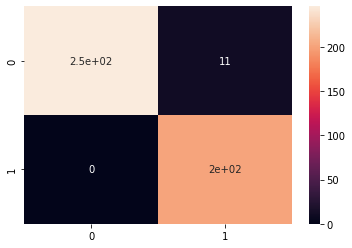

In [ ]:
## Bank Note ##
y_pred_lr_bank = Logistic_regression(X_train_bank, X_test_bank, y_train_bank, y_test_bank)
confusionMatrix(y_test_bank, y_pred_lr_bank)

print('Validation Model : Logistic Regression')
validateModel(y_test_bank, y_pred_lr_bank)

Validation Model : Logistic Regression
Your model has a log_loss of : 0.2577520626485882%
Your model has an accuracy of : 99.25373134328358%
Your model has a recall of : 98.24561403508771%
Your model has a F1 score = 0.9911504424778761 


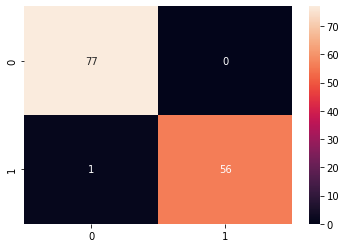

In [ ]:
# Disease Note ##
y_pred_lr_disease = Logistic_regression(X_train_disease, X_test_disease, y_train_disease, y_test_disease)
confusionMatrix(y_test_disease, y_pred_lr_disease)

print('Validation Model : Logistic Regression')
validateModel(y_test_disease, y_pred_lr_disease)

# KNN

In [ ]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
test_size = 0.3
for n in range(1,Ks):
    
    #Train Model and Predict  
    X_train, X_test, y_train, y_test = split_data_df(data_disease_cleaned, test_size)
    neigh  = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    y_pred = neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, y_pred)

    
    std_acc[n-1]=np.std(y_pred==y_test)/np.sqrt(y_pred.shape[0])

mean_acc

array([0.98333333, 0.98333333, 0.99166667, 0.975     , 0.98333333,
       0.98333333, 0.98333333, 0.99166667, 1.        ])

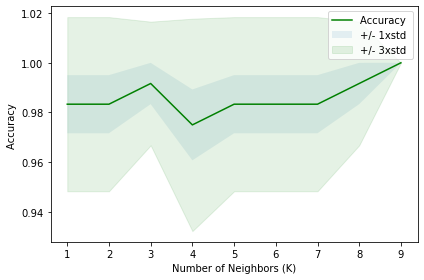

In [ ]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [ ]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 1.0 with k= 9


# Decision Forest

#### Bank dataset Train and Test :

In [6]:
# Training Decision Trees
Bank_Class_DeciForest = trainDecisionForest(X_train_bank, y_train_bank, 100)
Bank_Class_AdaBoost = trainAdaBoost(X_train_bank, y_train_bank, 100)

# Test Decision Trees
Bank_Predic_DeciForest = testClassifier(Bank_Class_DeciForest, X_test_bank)
Bank_Predic_AdaBoost = testClassifier(Bank_Class_AdaBoost, X_test_bank)

Optimal Depth = 8


Validation Model : Decision Forest
Your model has a log_loss of : 0.5278939579727646%
Your model has an accuracy of : 98.47161572052401%
Your model has a recall of : 98.95287958115183%
Your model has a F1 score = 0.9818181818181818 


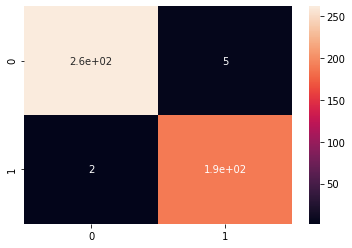

In [7]:
# Decision Trees Validation
Bank_Conf_DeciForest = confusionMatrix(y_test_bank, Bank_Predic_DeciForest)

print('Validation Model : Decision Forest')
validateModel(y_test_bank, Bank_Predic_DeciForest)


Validation Model : Ada Boost
Your model has a log_loss of : 0.1508260969153974%
Your model has an accuracy of : 99.56331877729258%
Your model has a recall of : 99.47643979057592%
Your model has a F1 score = 0.9947643979057592 


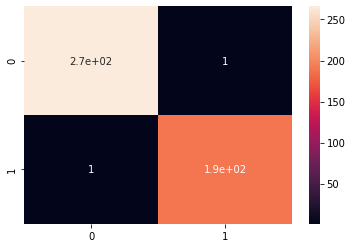

In [8]:
# Ada Boost Validation
Bank_Conf_AdaBoost = confusionMatrix(y_test_bank, Bank_Predic_AdaBoost)

print('Validation Model : Ada Boost')
validateModel(y_test_bank, Bank_Predic_AdaBoost)

#### Disease dataset Train and Test :

In [9]:
# Training Decision Trees
Disease_Class_DeciForest = trainDecisionForest(X_train_disease, y_train_disease, 100)
Disease_Class_AdaBoost = trainAdaBoost(X_train_disease, y_train_disease, 100)

# Test Decision Trees
Disease_Predic_DeciForest = testClassifier(Disease_Class_DeciForest, X_test_disease)
Disease_Predic_AdaBoost = testClassifier(Disease_Class_AdaBoost, X_test_disease)

Optimal Depth = 8


Validation Model : Decision Forest
Your model has a log_loss of : 0.2577580297935896%
Your model has an accuracy of : 99.25373134328358%
Your model has a recall of : 100.0%
Your model has a F1 score = 0.9906542056074767 


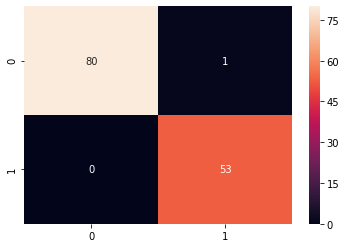

In [10]:
# Decision Trees Validation
Disease_Conf_DeciForest = confusionMatrix(y_test_disease, Disease_Predic_DeciForest)

print('Validation Model : Decision Forest')
validateModel(y_test_disease, Disease_Predic_DeciForest)

Validation Model : Ada Boost
Your model has a log_loss of : 0.2577580297935896%
Your model has an accuracy of : 99.25373134328358%
Your model has a recall of : 100.0%
Your model has a F1 score = 0.9906542056074767 


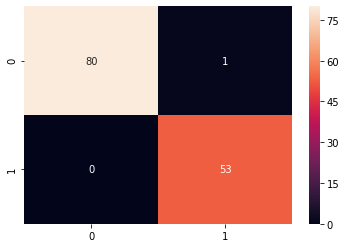

In [11]:
# Ada Boost Validation
Bank_Conf_AdaBoost = confusionMatrix(y_test_disease, Disease_Predic_AdaBoost)

print('Validation Model : Ada Boost')
validateModel(y_test_disease, Disease_Predic_AdaBoost)